# 2장 지도학습
## 2.1. 분류와 회귀  
- 분류  
이진 분류 : 두개의 클래스로 분류  
다중 분류 : 셋 이상의 클래스로 분류

- 회귀  
연속적인 숫자를 예측하는 것을 말한다.

## 2.2. 일반화, 과대적합, 과소적합  
- 일반화 : 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있다면 이를 훈련세트에서 테스트 세트로 일반화되었다고 말함  
- 과소적합 : 데이터의 다양성을 잡아내지 못하는 너무 간단한 모델을 만들게 되는 것  
- 과대적합 : 데이터의 모든 정보를 활용하려다 너무 복잡한 모델을 만들게 되는 것  

## 2.3. 지도학습 알고리즘  
### 2.3.1 KNN 알고리즘  
- 특징  
가장 간단한 머신러닝 알고리즘   
새로운 데이터를 예측할 때 가장 가까운 데이터로 예측하는 방법  
이웃(범위)의 수를 설정해주어야 한다  
거리는 유클리디안 거리방식을 사용한다  

- 장단  
훈련 세트의 수나 피쳐 수가 많을 경우 예측이 느려진다
대부분의 값이 0일 경우 잘 작동하지 않는다  
쉽지만 예측이 느리고 여러 피쳐를 처리하기에는 성능이 부족해 현업에서는 잘 쓰지 않는다

In [1]:
# !pip install numpy scipy matplotlib ipython scikit-learn pandas pillow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

C:\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


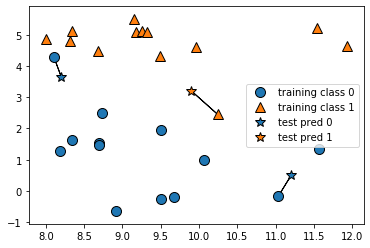

In [3]:
# 분류
mglearn.plots.plot_knn_classification(n_neighbors=1)

In [4]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [5]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [6]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [7]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

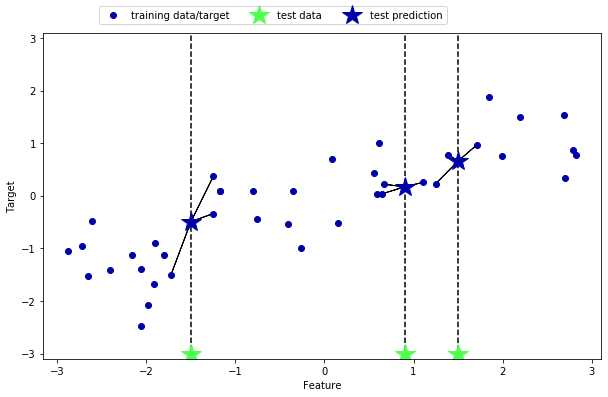

In [8]:
# 회귀
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [9]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [11]:
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

### 2.3.2 선형 모델  
100여 년 전에 개발되었으며 현재까지 널리 쓰인다.  
선형 모델은 입력 특성에 대한 선형 함수를 만들어 예측을 수행한다.  

w[0]: 0.393906  b: -0.031804


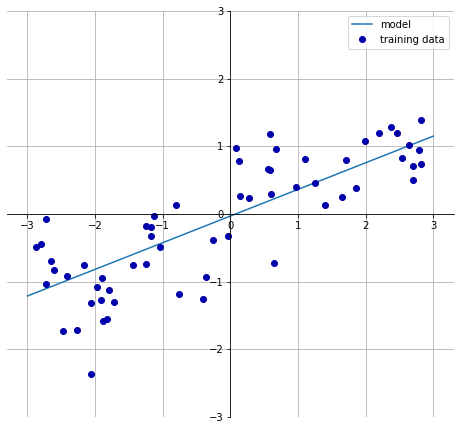

In [12]:
# 선형 회귀 모델
mglearn.plots.plot_linear_regression_wave()

#### 1. 선형 회귀(최소제곱법)  
- 특징  
가장 간단하고 오래된 회위용 선형 알고리즘
선형 회귀는 예측과 훈련 세트에 있는타깃 y 사이의 평균제곱오차 MSE를 최소화하는 파라미터 w,b를 찾는다.  
평균제곱오차는 예측값과 타깃값의 차이를 제곱하여 더한 후 샘플의 개수로 나눈 것이다.  

- 장단점  
매개변수가 없는 것이 장점이지만 모델의 복잡도를 제어할 방법이 없는 것이 단점이다.

In [13]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [15]:
lr = LinearRegression().fit(X_train, y_train)

- w, b  
w(기울기 파라미터) : lr 객체의 coef_ 속성에 저장되어 있다. (가중치 또는 계수라고 부름)  
b(편향 또는 절편 파라미터) : intercept_속성에 저장되어 있다.

In [16]:
lr.coef_

array([0.39390555])

In [17]:
lr.intercept_

-0.031804343026759746

In [18]:
lr.score(X_train, y_train)

0.6700890315075756

In [19]:
lr.score(X_test, y_test)

0.65933685968637

In [20]:
# 위 경우와는 달리 피쳐가 많을 경우 과소적합문제가 발생한다.
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [21]:
lr = LinearRegression().fit(X_train,y_train)

In [22]:
lr.score(X_train, y_train)

0.9520519609032729

In [23]:
lr.score(X_test, y_test)

0.607472195966585

#### 2. 릿지 회귀   
훈련 데이터와 테스트 데이터 사이의 성능차이는 모델이 과소적합되었다는 신호이다  
따라서 복잡도를 제어할 수 있는 모델을 사용해야 한다.  
기본 선형 회귀 대신 가장 널리 사용되는 것이 릿지회귀이다.  

- 특징
릿지 회귀에서 기울기 선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라 추가 제약 조전을 만족시키기 위한 목적  
기울기의 절대값을 가능한 작게 만든다  
선형회귀에 비해 과대적합이 적어진다.  
모델의 복잡도는 낮아지고 훈련세트에서는 성능이 나빠지지만 더 일반화된 모델이 된다  

In [24]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
ridge.score(X_train, y_train)

0.8857966585170941

In [25]:
ridge.score(X_test, y_test)

0.7527683481744755

In [26]:
# alpha 값 조정
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge10.score(X_train, y_train)

0.7882787115369614

In [27]:
ridge10.score(X_test, y_test)

0.6359411489177311

#### 3. 라쏘 회귀  
선형 회귀에 규제를 적용하는데 릿지의 대안으로 라쏘가 있다  
라쏘도 기울기를 0에 가깝게 만드지만 방식이 다르다.  
어떤 경우에는 실제 기울기가 0이 되어 제외되는 피쳐가 생긴다. 즉 피쳐 선택이 자동적으로 이뤄진다.  

In [28]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)

In [29]:
lasso.score(X_train, y_train)

0.29323768991114607

In [30]:
lasso.score(X_test, y_test)

0.20937503255272294

In [31]:
np.sum(lasso.coef_!=0)

4

위에서 보듯 과소 적합이 발생하며 105개 특성 중 4개만 사용  
릿지 회귀처럼 매개변수 alpha를 지원한다.  
과소 적합을 줄이기 위해 alpha값을 줄여보았다. 이렇게 하려면 max_iter(반복 실행하는 최대횟수)의 기본값을 늘려야 한다.  

In [32]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

In [33]:
lasso001.score(X_train, y_train)

0.8962226511086497

In [34]:
lasso001.score(X_test, y_test)

0.7656571174549983

In [35]:
np.sum(lasso.coef_!=0)

4

실제로 두 모델 중 릿지를 선호한다. 하지만 특성이 많고 그 중 일부분만 중요하다면 라쏘가 더 좋은 선택일 수 있다.  
scikit-learn에서는 이 둘의 패널티를 결합한 ElasticNet을 제공한다. 이 조합은 최상의 성능을 내지만 L1,L2 규제를 위한 매개변수 두개를 조정해야한다.

#### 4. 분류용 선형모델  
- 로지스틱 회귀  
- 서포트 벡터 머신

1. 로지스틱 회귀  
전형적인 Binary classification algorithm으로 결과값이 이진변수이다.우리는 회귀분석에서 x값이 증가할 때 y값을 예측하는 것을 기본으로 생각한다. 하지만 y값이 이진변수일 경우에는 어떻게 해야할까?  결론부터 말하면 이진변수인 결과값을 음의 무한대에서 양의 무한대의 범위를 가진 일반 연속변수로 바꾸어 계산하며 된다. 그렇게되면 기존의 선형회귀문제와 동일하게 문제를 풀 수 있다. 이 때 중요한 개념이 Odds ration 또는 오즈비이다. 



In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [37]:
X, y = mglearn.datasets.make_forge()

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


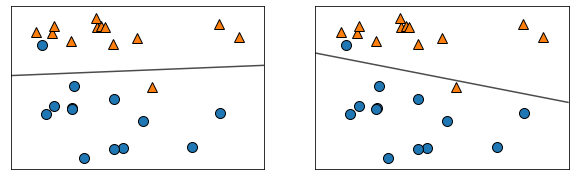

In [38]:
fig, axes = plt.subplots(1,2, figsize=(10,3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes) :
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)

2. SVM  
일반적으로 train 데이터에서 두 클래스의 결정 경계에 위치한 데이터 포인트들만이 분류를 하는데 영향을 끼친다. 따라서 이런 데이터들을 일컬어 서포트 벡터(Support Vector)라 하며 서포트 벡터 머신이라는 이름이 유래하였다. 서포트 벡터를 지나는 경계선끼리의 거리를 마진이라 부르며 SVM 모델은 train 데이터의 이 마진을 극대화하여 일반화 오류를 최소화하는 것이다. 이 분류기 역시 로지스틱 회귀와 같이 이진변수일 경우 사용이 가능하다.  *선형 모델은 태생적으로 이진 분류만 지원한다. 물론 로지스틱 회귀는 소프트맥스 함수를 사용하여 다중 분류를 지원한다. 

3. 나이브 베이즈 분류기  
나이브 베이즈 분류기는 앞의 선형 모델과 매우 유사하다. scikit-learn에 구현된 분류기는 3가지이다.  

GaussianNB : 연속적인 데이터에도 적용 가능  
BernouliNB : 이진 데이터에 적용 가능  
MultinomialNB : 카운트 데이터(특성이 어떤 것을 헤아린 정수. 베르누이와 함께 텍스트 데이터 분류시 많이 사용  

https://duckkkk.com/entry/%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5-%EB%82%98%EC%9D%B4%EB%B8%8C%EB%B2%A0%EC%9D%B4%EC%A6%88

### 2.3.3. 결정 트리
분류와 회귀 모두 널리 사용하는 모델

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

In [40]:
# pip install graphviz

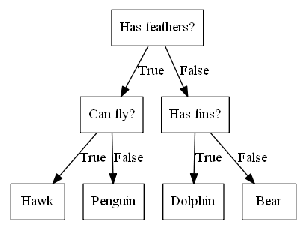

In [41]:
mglearn.plots.plot_animal_tree()

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
tree.score(X_train, y_train)

1.0

In [43]:
tree.score(X_test, y_test)

0.9370629370629371

In [44]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
tree.score(X_train, y_train)

0.9882629107981221

In [45]:
tree.score(X_test, y_test)

0.951048951048951

In [46]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성","양성"], feature_names=cancer.feature_names, impurity= False, filled = True)

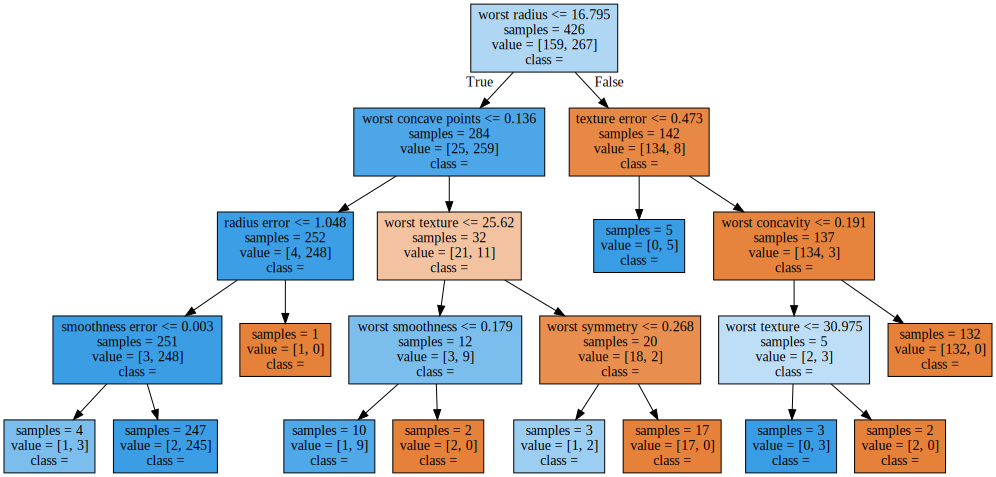

In [47]:
import graphviz

with open("tree.dot",encoding='UTF-8') as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### 트리의 특서 중요도  
어떤 특성이 얼마나 중요한지 평가하는 것 0~1 사이 숫자

In [48]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

In [49]:
def plot_feature_importance_cancer(model) :
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
    plt.rc('font', family='NanumGothic')

In [50]:
# 그래프 삽입 모듈 및 그래프 내 한글 폰트 삽입 코드
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing 

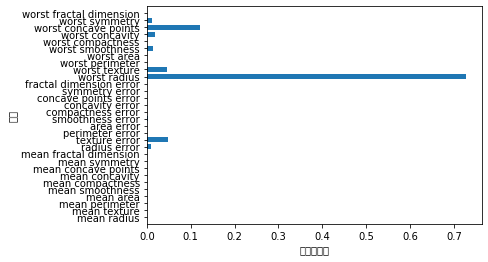

In [51]:
plot_feature_importance_cancer(tree)

### 2.3.4 결정트리의 앙상블

앙상블은 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법입니다. 두 앙상블 모델이 분류와 회귀 문제의 다양한 데이터셋에서 효과적이라고 입증되었습니다. 랜덤 포레스트와 그래디언트 부스팅 결정 트리는 둘 다 모델을 구성하는 기본 요소로 결정 트를 사용합니다.


#### - 랜덤 포레스트  
결정 트리의 단점은 훈련 데이터에 과대적합되는 경향이 있다는 것이다. 랜덤 포레스트는 이 문제를 회피할 수 있는 방법이다.  
주요 아이디어는 각 트리는 비교적 예측력이 높으나 데이터의 일부에 과대적합하는 경향을 가진다는 데 기초한다. 잘 작동하되 서로 다른 방향으로 과대적합된 트리를 많이 만들면 그 결과를 평균냄으로써 과대적합된 양을 줄일 수 있다.   

이를 위해선 트리를 무작위로 많이 생성해야하는데 두가지 방법으로 나뉜다.  
- 트리를 만들때 데이터 포인트를 무작위로 선택하는 방법  
- 분할 테스트에서 특성을 무작위로 선택하는 방법

#### 랜덤 포레스트 구축 시 매개변수  
- 데이터 샘플 결정 : n_samples  
- 특성 수 결정 : max_features  

특성의 수가 많을 수록 트리들은 비슷해지고 가장 두드러진 특성을 이용해 데이터에 잘 맞춰질 것이다.

#### 랜덤 포레스트 분석  

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)

In [53]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47004 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-

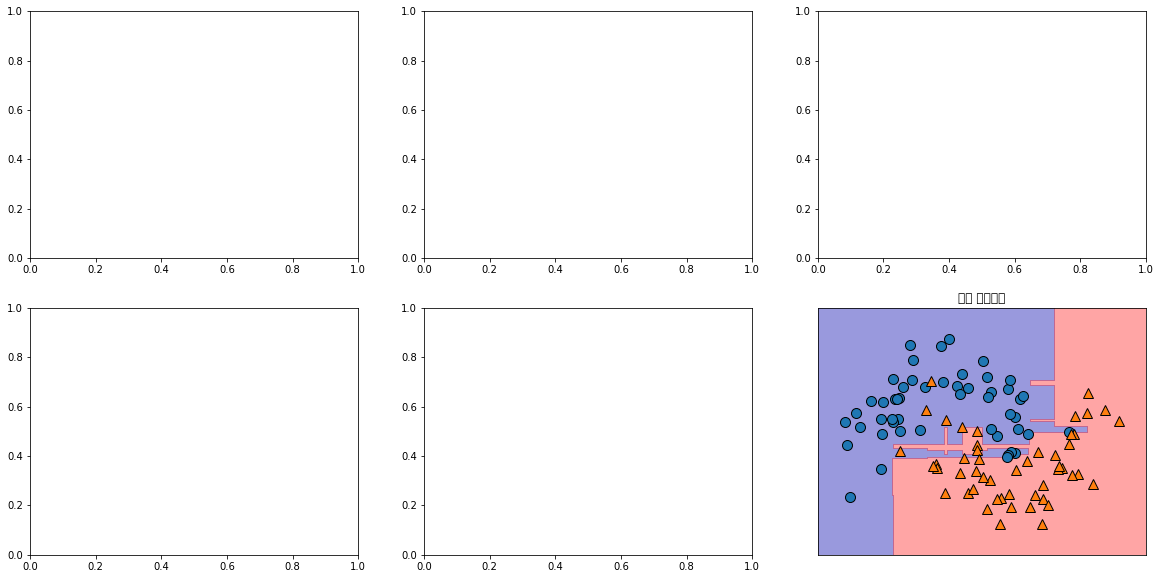

In [57]:
fig , axes = plt.subplots(2,3, figsize=(20,10))
for i, (x, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X,y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill = True, ax=axes[-1,-1], alpha=0.4)
axes[-1,-1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:,0], X[:,1], y)

#### 그래디언트 부스팅 회귀 트리  
무작위성이 없다. 순차적으로 트리를 만든다. 대신 강력한 사전 가지치기가 사용된다. 업계에서도 많이 사용되는 방법.  

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [59]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [60]:
gbrt.score(X_train, y_train)

1.0

In [61]:
gbrt.score(X_test, y_test)

0.965034965034965

In [62]:
# 과대 적합을 피하기위해 가지치기
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [63]:
gbrt.score(X_train, y_train)

0.9906103286384976

In [64]:
gbrt.score(X_test, y_test)

0.972027972027972

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Anaconda3\lib\site-pa

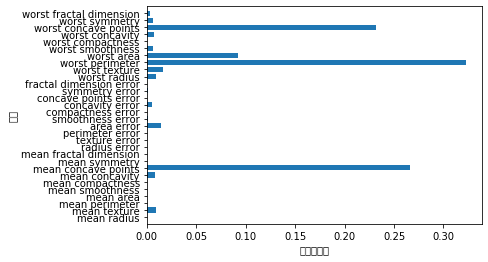

In [65]:
plot_feature_importance_cancer(gbrt)

랜덤포레스트의 특성 중요도와 비슷하다. 다만 그래디언트부스팅은 일부 특성을 완전히 무시한다.
둘 다 비슷하게 잘 작동하지만 보통 더 안정적인 랜덤 포레스트를 먼저 적용하곤 한다. 랜덤포레스트가 잘 작동하더라도 예측 시간이 중요하거나 머신러닝 모델에서
마지막 성능까지 쥐어짜야 할 때 그래디언트 부스팅을 사용하면 도움이 된다.

#### 장단점과 매개변수  
gbrt는 지도학습에서 가장 강력하고 널리 사용하는 모델 중 하나이다. 가장 큰 단점을 매개변수를 잘 조정해야 한다는 것과 훈련 시간이 길다.

### 2.3.5. 커널 서포트 벡터 머신  
보통 SVM이라고 부른다. 입력 데이터에서 단순한 초평면으로 정의되지 않는 더 복잡한 모델을 만들 수 있도록 확장한 것이다.

In [70]:
 from sklearn.datasets import make_blobs

In [71]:
X, y = mglearn.datasets.make_blobs()

Text(0, 0.5, 'Feature 1')

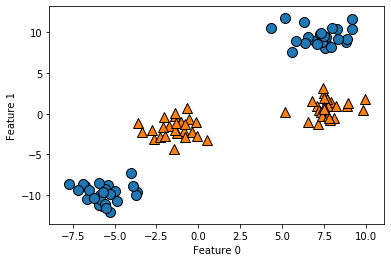

In [87]:
X, y = make_blobs(centers=4, random_state=8)
y = y%2

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Feature 1')

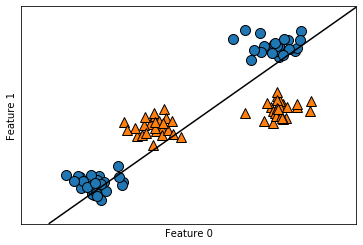

In [88]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [76]:
X_new = np.hstack([X,X[:,1:]**2])

Text(0.5, 0, 'Feature 1**2')

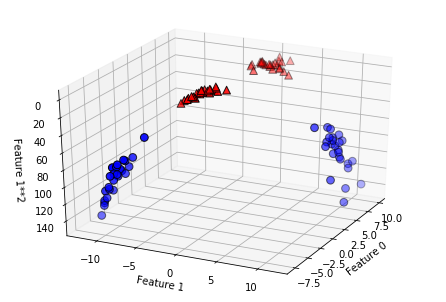

In [89]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

ax = Axes3D(figure, elev=-152, azim=-26)
mask = y == 0

ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c='b',
          cmap=mglearn.cm2, s=60, edgecolor='k')

ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c='r',
          cmap=mglearn.cm2, s=60, edgecolor='k', marker = '^')

ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1**2")

In [85]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'Feature 1**2')

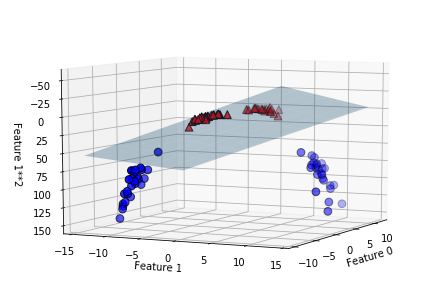

In [90]:
figure = plt.figure()
ax = Axes3D(figure, elev = -1612, azim =-26)
xx = np.linspace(X_new[:,0].min() - 2, X_new[:,0].max()+2, 50)
yy = np.linspace(X_new[:,1].min() - 2, X_new[:,1].max()+2, 50)

XX, YY = np.meshgrid(xx,yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride =8, cstride =8 , alpha=0.3)
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c='b',
          cmap=mglearn.cm2, s=60, edgecolor='k')

ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c='r',
          cmap=mglearn.cm2, s=60, edgecolor='k', marker = '^')

ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1**2")